In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
crashes_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=download'
df_crashes= pd.read_csv(crashes_url, low_memory= False)


In [ ]:
persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'
df_persons = pd.read_csv(persons_url, low_memory = False)


In [ ]:
df_crashes.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [ ]:

print(df_crashes.shape)

(2221559, 29)


In [ ]:
print(df_crashes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221559 entries, 0 to 2221558
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [ ]:
print(df_crashes.describe(include='all'))

        CRASH DATE CRASH TIME   BOROUGH ZIP CODE      LATITUDE     LONGITUDE  \
count      2221559    2221559   1541066  1540789  1.981191e+06  1.981191e+06   
unique        4887       1440         5      235           NaN           NaN   
top     01/21/2014      16:00  BROOKLYN    11207           NaN           NaN   
freq          1161      29707    493922    30446           NaN           NaN   
mean           NaN        NaN       NaN      NaN  4.058943e+01 -7.368250e+01   
std            NaN        NaN       NaN      NaN  2.337448e+00  4.344364e+00   
min            NaN        NaN       NaN      NaN  0.000000e+00 -2.013600e+02   
25%            NaN        NaN       NaN      NaN  4.066734e+01 -7.397453e+01   
50%            NaN        NaN       NaN      NaN  4.072031e+01 -7.392673e+01   
75%            NaN        NaN       NaN      NaN  4.076956e+01 -7.386657e+01   
max            NaN        NaN       NaN      NaN  4.334444e+01  0.000000e+00   

          LOCATION                    O

In [ ]:
#Putting date and time in one column
df_crashes["CRASH DATE"] = df_crashes["CRASH DATE"] + " " + df_crashes["CRASH TIME"]
df_crashes["CRASH DATE"] = pd.to_datetime(df_crashes["CRASH DATE"])


From the date column, let us create four more columns,


1.   Crash year, will have only the year of crash.

2.   Crash month will have the month relating to the crash in numeric format.

3.   Crash month name will be the name of the month.

4.   Crash hour will be the hour of the day, in 24hr format, when the crash occurred.


In [ ]:
df_crashes["CRASH YEAR"] = df_crashes["CRASH DATE"].dt.year
df_crashes["CRASH MONTH"] = df_crashes["CRASH DATE"].dt.month
df_crashes["CRASH MONTH NAME"] = df_crashes["CRASH DATE"].dt.strftime('%b')
df_crashes["CRASH HOUR"] = df_crashes["CRASH DATE"].dt.hour
df_crashes["CRASH WEEK"] = df_crashes["CRASH DATE"].dt.strftime('%a')

In [ ]:
df_crashes.columns


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'CRASH YEAR', 'CRASH MONTH', 'CRASH MONTH NAME', 'CRASH HOUR',
       'CRASH WEEK'],
      dtype='object')

We decided to drop some of the columns related to the location that were too specific such as:


1.   Zip code
2.   Longitude and Latitude coordinates
3.   Streets

We also dropped the additional contributing factors and vehicle codes.



In [ ]:
to_drop = ['ZIP CODE', 'LATITUDE', 'LONGITUDE','LOCATION','OFF STREET NAME',
          'CRASH TIME', 'ON STREET NAME','CROSS STREET NAME',
           'CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
           'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']
df_clean = df_crashes.drop(to_drop, axis = 1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221559 entries, 0 to 2221558
Data columns (total 20 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   BOROUGH                        object        
 2   NUMBER OF PERSONS INJURED      float64       
 3   NUMBER OF PERSONS KILLED       float64       
 4   NUMBER OF PEDESTRIANS INJURED  int64         
 5   NUMBER OF PEDESTRIANS KILLED   int64         
 6   NUMBER OF CYCLIST INJURED      int64         
 7   NUMBER OF CYCLIST KILLED       int64         
 8   NUMBER OF MOTORIST INJURED     int64         
 9   NUMBER OF MOTORIST KILLED      int64         
 10  CONTRIBUTING FACTOR VEHICLE 1  object        
 11  CONTRIBUTING FACTOR VEHICLE 2  object        
 12  COLLISION_ID                   int64         
 13  VEHICLE TYPE CODE 1            object        
 14  VEHICLE TYPE CODE 2            object        
 15  CRASH YEAR     

In [ ]:
df_clean.isna().sum()


,0
CRASH DATE,0
BOROUGH,680493
NUMBER OF PERSONS INJURED,18
NUMBER OF PERSONS KILLED,31
NUMBER OF PEDESTRIANS INJURED,0
NUMBER OF PEDESTRIANS KILLED,0
NUMBER OF CYCLIST INJURED,0
NUMBER OF CYCLIST KILLED,0
NUMBER OF MOTORIST INJURED,0
NUMBER OF MOTORIST KILLED,0


In [ ]:
df_clean[['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2']].value_counts()


CONTRIBUTING FACTOR VEHICLE 1   CONTRIBUTING FACTOR VEHICLE 2 
Unspecified                     Unspecified                       548597
Driver Inattention/Distraction  Unspecified                       307311
Following Too Closely           Unspecified                       104801
Failure to Yield Right-of-Way   Unspecified                        88394
Driver Inattention/Distraction  Driver Inattention/Distraction     74692
                                                                   ...  
Accelerator Defective           Obstruction/Debris                     1
                                Failure to Keep Right                  1
                                Passing Too Closely                    1
                                Outside Car Distraction                1
80                              Tire Failure/Inadequate                1
Name: count, Length: 1817, dtype: int64

In [ ]:
df_clean['VEHICLE TYPE CODE 1'].value_counts()[df_clean['VEHICLE TYPE CODE 1'].value_counts()> 1000]


,count
VEHICLE TYPE CODE 1,
Sedan,642338
Station Wagon/Sport Utility Vehicle,503047
PASSENGER VEHICLE,416206
SPORT UTILITY / STATION WAGON,180291
Taxi,55884
4 dr sedan,40187
Pick-up Truck,38269
TAXI,31911
Box Truck,26565


In [ ]:
df_clean[['BOROUGH']].value_counts()

,count
BOROUGH,
BROOKLYN,493922
QUEENS,412931
MANHATTAN,341511
BRONX,228187
STATEN ISLAND,64515


For the null values, we decided to:


1.   Replace null values for contributing factors with "Unspecified" cause we have a lot of nulls.
2.   Replace null values for contributing factors and Borough with "UNKOWN" cause we have a lot of nulls.
3.   Drop null values for number of persons injured and killed cause they are very few.



In [ ]:
contributing_factors = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']
for col in contributing_factors:
    df_clean[col] = df_clean[col].fillna('Unspecified')

vehicle_type_codes = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2','BOROUGH']
for col in vehicle_type_codes:
    df_clean[col] = df_clean[col].fillna('UNKNOWN')

# Drop null values for persons injured and killed
df_clean.dropna(subset=['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED'], inplace=True)

print(df_clean.isna().sum())

CRASH DATE                       0
BOROUGH                          0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
CRASH YEAR                       0
CRASH MONTH                      0
CRASH MONTH NAME                 0
CRASH HOUR                       0
CRASH WEEK                       0
dtype: int64


In [ ]:
# Dropping duplicate rows
df_clean.drop_duplicates(inplace=True)

*   SPORT UTILITY / STATION WAGON and Station Wagon/Sport Utility Vehicle are treated as different categories, we will rename the former to match the later.
*   The same is observed in the instances of Sedan vs dr 4 sedan.



In [ ]:
df_clean["VEHICLE TYPE CODE 1"] = df_clean["VEHICLE TYPE CODE 1"].replace(["SPORT UTILITY / STATION WAGON"], "Station Wagon/Sport Utility Vehicle")
df_clean["VEHICLE TYPE CODE 2"] = df_clean["VEHICLE TYPE CODE 2"].replace(["SPORT UTILITY / STATION WAGON"], "Station Wagon/Sport Utility Vehicle")
df_clean['VEHICLE TYPE CODE 1'] = df_clean['VEHICLE TYPE CODE 1'].replace(["4 dr sedan"], "Sedan")
df_clean['VEHICLE TYPE CODE 2'] = df_clean['VEHICLE TYPE CODE 2'].replace(["4 dr sedan"], "Sedan")

In [ ]:
# Number of persons injured and killed should be int not float
df_clean['NUMBER OF PERSONS INJURED'] = df_clean['NUMBER OF PERSONS INJURED'].astype(int)
df_clean['NUMBER OF PERSONS KILLED'] = df_clean['NUMBER OF PERSONS KILLED'].astype(int)

In [ ]:
# Standardizing factors and vehicle types to be small
df_clean['VEHICLE TYPE CODE 1'] = df_clean['VEHICLE TYPE CODE 1'].str.lower()
df_clean['VEHICLE TYPE CODE 2'] = df_clean['VEHICLE TYPE CODE 2'].str.lower()
df_clean['CONTRIBUTING FACTOR VEHICLE 1'] = df_clean['CONTRIBUTING FACTOR VEHICLE 1'].str.lower()
df_clean['CONTRIBUTING FACTOR VEHICLE 2'] = df_clean['CONTRIBUTING FACTOR VEHICLE 2'].str.lower()


In [ ]:
# Check if there is negative values
print(df_clean[df_clean['NUMBER OF PERSONS INJURED'] < 0].shape)
print(df_clean[df_clean['NUMBER OF PERSONS KILLED'] < 0].shape)
print(df_clean[df_clean['NUMBER OF PEDESTRIANS INJURED'] < 0].shape)
print(df_clean[df_clean['NUMBER OF PEDESTRIANS KILLED'] < 0].shape)
print(df_clean[df_clean['NUMBER OF CYCLIST INJURED'] < 0].shape)
print(df_clean[df_clean['NUMBER OF CYCLIST KILLED'] < 0].shape)

(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)
(0, 21)


We classified the collision as safe if no one was injured or killed and dangerous if else.

In [ ]:
def conditions(df):
    if (df['NUMBER OF PERSONS INJURED'] == 0) and (df['NUMBER OF PERSONS KILLED'] == 0) :
        return 0
    else:
        return 1

df_clean['IsDanger'] = df_clean.apply(conditions, axis=1)

Question 1:
How does the rate of collisions change by each year?

We find that collisions rose dramatically in 2013 and then dipped in 2020 (probably because of lockdown)

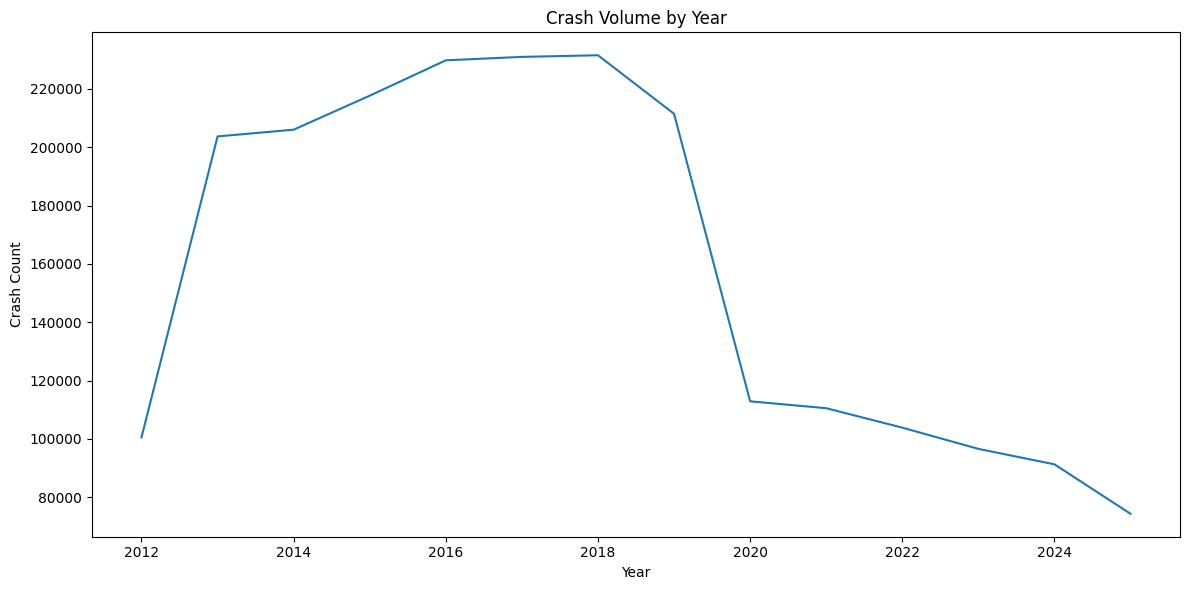

In [ ]:
# Crash volume trend by year
crash_volume_by_year = df_crashes.groupby('CRASH YEAR')['COLLISION_ID'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=crash_volume_by_year.index, y=crash_volume_by_year.values)
plt.title('Crash Volume by Year')
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.tight_layout()
plt.show()


Question 2:
How does the rate of collisions change by the hour?

We find that collisions peak between 6pm and 7pm because this is the rush hour in which workers and employees leave work in NYC.

/tmp/ipython-input-3763915162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_crash, x="CRASH HOUR", y="Number Of Collisions", palette=palette_y)
/tmp/ipython-input-3763915162.py:5: UserWarning: 
The palette list has fewer values (1) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=hourly_crash, x="CRASH HOUR", y="Number Of Collisions", palette=palette_y)


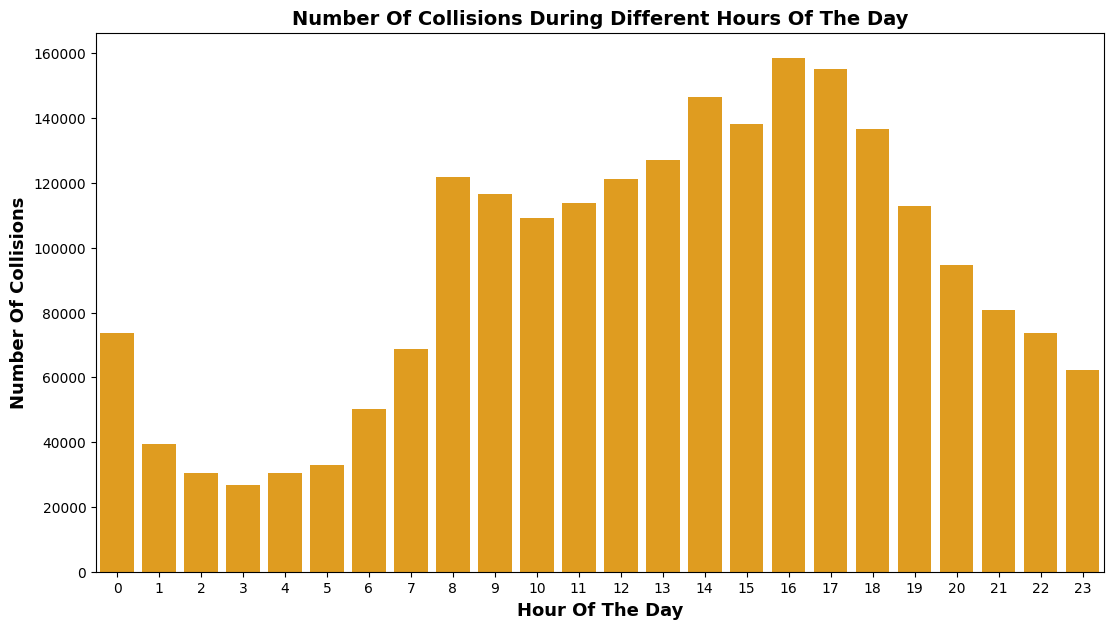

In [ ]:
hourly_crash = df_clean.groupby("CRASH HOUR").size().reset_index(name="Number Of Collisions")
palette_x= ["blue"]
palette_y= ["orange"]
plt.figure(figsize=(13,7))
sns.barplot(data=hourly_crash, x="CRASH HOUR", y="Number Of Collisions", palette=palette_y)
plt.ylabel("Number Of Collisions", fontweight="bold", fontsize=13)
plt.xlabel("Hour Of The Day", fontweight="bold", fontsize=13)
plt.title("Number Of Collisions During Different Hours Of The Day",
          fontweight="bold", fontsize=14)

plt.show()

Question 3:
What are the top contributing factors of dangerous collisions?

Driver's attention or distraction is the main factor for a very large number of the collisions.


/tmp/ipython-input-663023021.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_factors.index, y=top_5_factors.values, palette='viridis')


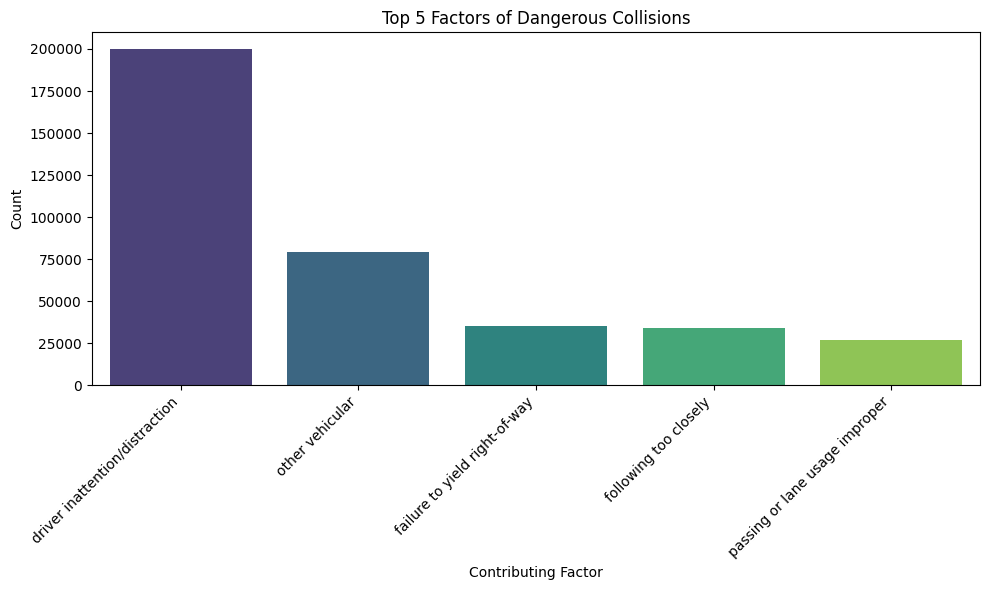

In [ ]:
# Plot for the top 5 factors of DANGEROUS collisions (Combine both factors 1 and 2 and remove unspecified)
df_not_unspecified = df_clean[(df_clean['CONTRIBUTING FACTOR VEHICLE 1'] != 'unspecified') & (df_clean['CONTRIBUTING FACTOR VEHICLE 2'] != 'unspecified')] & (df_clean['IsDanger'] == 1)
top_5_factors = df_not_unspecified['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(5)
top_5_factors = top_5_factors.add(df_not_unspecified['CONTRIBUTING FACTOR VEHICLE 2'].value_counts().head(5), fill_value=0)
top_5_factors = top_5_factors.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_factors.index, y=top_5_factors.values, palette='viridis')
plt.title('Top 5 Factors of Dangerous Collisions')
plt.xlabel('Contributing Factor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




# Persons dataset

In [ ]:

df_persons.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [ ]:
print(df_persons.shape)

(5823480, 21)


In [ ]:
df_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5823480 entries, 0 to 5823479
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   UNIQUE_ID              int64  
 1   COLLISION_ID           int64  
 2   CRASH_DATE             object 
 3   CRASH_TIME             object 
 4   PERSON_ID              object 
 5   PERSON_TYPE            object 
 6   PERSON_INJURY          object 
 7   VEHICLE_ID             float64
 8   PERSON_AGE             float64
 9   EJECTION               object 
 10  EMOTIONAL_STATUS       object 
 11  BODILY_INJURY          object 
 12  POSITION_IN_VEHICLE    object 
 13  SAFETY_EQUIPMENT       object 
 14  PED_LOCATION           object 
 15  PED_ACTION             object 
 16  COMPLAINT              object 
 17  PED_ROLE               object 
 18  CONTRIBUTING_FACTOR_1  object 
 19  CONTRIBUTING_FACTOR_2  object 
 20  PERSON_SEX             object 
dtypes: float64(2), int64(2), object(17)
memory usage: 933.

In [ ]:
print(df_persons.describe(include='all'))

           UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME PERSON_ID  \
count   5.822658e+06  5.822658e+06     5822658    5822658   5822639   
unique           NaN           NaN        4886       1440   5627835   
top              NaN           NaN  11/15/2018       0:00         1   
freq             NaN           NaN        4220      87469    142787   
mean    9.376661e+06  4.016632e+06         NaN        NaN       NaN   
std     2.762855e+06  6.649750e+05         NaN        NaN       NaN   
min     1.092200e+04  3.700000e+01         NaN        NaN       NaN   
25%     7.099309e+06  3.705553e+06         NaN        NaN       NaN   
50%     9.574334e+06  4.060754e+06         NaN        NaN       NaN   
75%     1.188629e+07  4.439549e+06         NaN        NaN       NaN   
max     1.353666e+07  4.858114e+06         NaN        NaN       NaN   

       PERSON_TYPE PERSON_INJURY    VEHICLE_ID    PERSON_AGE     EJECTION  \
count      5822658       5822658  5.581137e+06  5.172206e+06      2993

In [ ]:
df_persons.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')

In [ ]:
to_drop = ['CRASH_DATE','CRASH_TIME','VEHICLE_ID']
df_persons_clean = df_persons.drop(to_drop, axis = 1)
df_persons_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5823480 entries, 0 to 5823479
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   UNIQUE_ID              int64  
 1   COLLISION_ID           int64  
 2   PERSON_ID              object 
 3   PERSON_TYPE            object 
 4   PERSON_INJURY          object 
 5   PERSON_AGE             float64
 6   EJECTION               object 
 7   EMOTIONAL_STATUS       object 
 8   BODILY_INJURY          object 
 9   POSITION_IN_VEHICLE    object 
 10  SAFETY_EQUIPMENT       object 
 11  PED_LOCATION           object 
 12  PED_ACTION             object 
 13  COMPLAINT              object 
 14  PED_ROLE               object 
 15  CONTRIBUTING_FACTOR_1  object 
 16  CONTRIBUTING_FACTOR_2  object 
 17  PERSON_SEX             object 
dtypes: float64(1), int64(2), object(15)
memory usage: 799.7+ MB


In [ ]:
df_persons_clean.isna().sum()

,0
UNIQUE_ID,0
COLLISION_ID,0
PERSON_ID,19
PERSON_TYPE,0
PERSON_INJURY,0
PERSON_AGE,650573
EJECTION,2829327
EMOTIONAL_STATUS,2732204
BODILY_INJURY,2732161
POSITION_IN_VEHICLE,2828870


In [ ]:
df_persons_clean["EJECTION"].value_counts()


,count
EJECTION,
Not Ejected,2933320
Ejected,29973
Does Not Apply,15888
Partially Ejected,12962
Trapped,1469
Unknown,541


For the null values, we decided to:


1.   Replace null values for contributing factors with "Unspecified" cause we have a lot of nulls.
2.   Replace null values for other categorical fetures with "Unkown" cause we have a lot of nulls.
3.   Drop null values for PersonID cause they are very few.
4.   Replace null values for sex with "U"
5.   Replace null values for age with Median



In [ ]:

contributing_factors_persons = ['CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2']
for col in contributing_factors_persons:
    df_persons_clean[col] = df_persons_clean[col].fillna('Unspecified')

categorical_cols_to_fill_unknown = [
    'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
    'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT', 'PED_ROLE'
]
for col in categorical_cols_to_fill_unknown:
    df_persons_clean[col] = df_persons_clean[col].fillna('Unknown')
df_persons_clean['PERSON_SEX'] = df_persons_clean['PERSON_SEX'].fillna('U')
df_persons_clean['PERSON_AGE'] = df_persons_clean['PERSON_AGE'].fillna(df_persons_clean['PERSON_AGE'].median())

df_persons_clean.dropna(subset=['PERSON_ID'], inplace=True)

print(df_persons_clean.isna().sum())

UNIQUE_ID                0
COLLISION_ID             0
PERSON_ID                0
PERSON_TYPE              0
PERSON_INJURY            0
PERSON_AGE               0
EJECTION                 0
EMOTIONAL_STATUS         0
BODILY_INJURY            0
POSITION_IN_VEHICLE      0
SAFETY_EQUIPMENT         0
PED_LOCATION             0
PED_ACTION               0
COMPLAINT                0
PED_ROLE                 0
CONTRIBUTING_FACTOR_1    0
CONTRIBUTING_FACTOR_2    0
PERSON_SEX               0
dtype: int64


In [ ]:
# Dropping duplicate rows
df_persons_clean.drop_duplicates(inplace=True)

In [ ]:
# Removing outliers: we assume age should be in the range of 0, 125
# Checking number of rows that have age greater than 125 or less than 0 then removing them
print(df_persons_clean[df_persons_clean['PERSON_AGE'] > 125].shape)
print(df_persons_clean[df_persons_clean['PERSON_AGE'] < 0].shape)
df_persons_clean = df_persons_clean[df_persons_clean['PERSON_AGE'] <= 125]
df_persons_clean = df_persons_clean[df_persons_clean['PERSON_AGE'] >= 0]

(3079, 18)
(1296, 18)


Question 4:

Is there a gender that has a higher rate of collisions? Msh asdena 7aga :)

Men have double the number of collisions as Women.

/tmp/ipython-input-1138616843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')


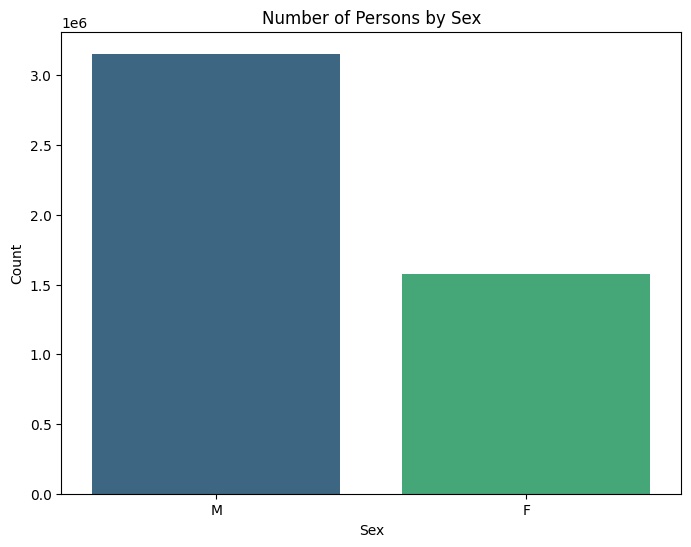

In [ ]:
# Plot bar chart for sex without 'U'
sex_counts = df_persons_clean[df_persons_clean['PERSON_SEX'] != 'U']['PERSON_SEX'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')
plt.title('Number of Persons by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


Question 5: What are the top contributing factors for the people themselves?

In [ ]:
# plot top 5 factors that are not "Unspecified"
df_not_unspecified = df_persons_clean[df_persons_clean['CONTRIBUTING_FACTOR_1'] != 'Unspecified'] & (df_persons_clean['CONTRIBUTING_FACTOR_2'] != 'Unspecified')
top_5_factors = df_not_unspecified['CONTRIBUTING_FACTOR_1'].value_counts().head(5)
top_5_factors = top_5_factors.add(df_not_unspecified['CONTRIBUTING_FACTOR_2'].value_counts().head(5), fill_value=0)
top_5_factors = top_5_factors.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_factors.index, y=top_5_factors.values, palette='viridis')
plt.title('Top 5 Factors of Dangerous Collisions')
plt.xlabel('Contributing Factor')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We joined the two datasets using an inner join on collision_id

In [ ]:
df_merged = pd.merge(df_clean, df_persons_clean, on='COLLISION_ID', how='inner')
print("Shape of the merged DataFrame:", df_merged.shape)
print("First 5 rows of the merged DataFrame:")
print(df_merged.head())

: 

: 

Post-Integration Cleaning


In [ ]:
print(df_merged.shape)

In [ ]:
print(df_merged.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6447176 entries, 0 to 6447175
Data columns (total 47 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   BOROUGH                        object        
 1   ZIP CODE                       object        
 2   LATITUDE                       float64       
 3   LONGITUDE                      float64       
 4   LOCATION                       object        
 5   ON STREET NAME                 object        
 6   CROSS STREET NAME              object        
 7   OFF STREET NAME                object        
 8   NUMBER OF PERSONS INJURED      int64         
 9   NUMBER OF PERSONS KILLED       int64         
 10  NUMBER OF PEDESTRIANS INJURED  int64         
 11  NUMBER OF PEDESTRIANS KILLED   int64         
 12  NUMBER OF CYCLIST INJURED      int64         
 13  NUMBER OF CYCLIST KILLED       int64         
 14  NUMBER OF MOTORIST INJURED     int64         
 15  NUMBER OF MOTOR

In [ ]:
print(df_merged.isnull().sum())


BOROUGH                                0
ZIP CODE                               0
LATITUDE                               0
LONGITUDE                              0
LOCATION                          637137
ON STREET NAME                         0
CROSS STREET NAME                      0
OFF STREET NAME                        0
NUMBER OF PERSONS INJURED              0
NUMBER OF PERSONS KILLED               0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1          0
CONTRIBUTING FACTOR VEHICLE 2          0
CONTRIBUTING FACTOR VEHICLE 3          0
CONTRIBUTING FACTOR VEHICLE 4          0
CONTRIBUTING FACTOR VEHICLE 5          0
COLLISION_ID                           0
VEHICLE TYPE CODE 1                    0
VEHICLE TYPE CODE 2                    0
VEHICLE TYPE COD

In [ ]:
print(df_merged.describe(include='all'))


        BOROUGH ZIP CODE      LATITUDE     LONGITUDE    LOCATION  \
count   6447176  6447176  6.447176e+06  6.447176e+06     5810039   
unique        6      236           NaN           NaN      333618   
top     Unknown  Unknown           NaN           NaN  (0.0, 0.0)   
freq    2305590  2306592           NaN           NaN       21619   
mean        NaN      NaN  3.656338e+01 -6.637378e+01         NaN   
min         NaN      NaN  0.000000e+00 -2.013600e+02         NaN   
25%         NaN      NaN  4.064270e+01 -7.396434e+01         NaN   
50%         NaN      NaN  4.070791e+01 -7.391327e+01         NaN   
75%         NaN      NaN  4.076543e+01 -7.383173e+01         NaN   
max         NaN      NaN  4.334444e+01  0.000000e+00         NaN   
std         NaN      NaN  1.233494e+01  2.241758e+01         NaN   

       ON STREET NAME CROSS STREET NAME OFF STREET NAME  \
count         6447176           6447176         6447176   
unique          22696             24799          259173   
top   

In [ ]:
print(df_merged.duplicated().sum())

0


Data looks good with no duplicates and not that many nulls so we will not be changing anything.

In [ ]:
!pip install pyarrow

In [ ]:
# Convert the column to string to handle both numbers and 'Unknown'
df_merged['VEHICLE_ID'] = df_merged['VEHICLE_ID'].astype(str)

# Use Parquet instead of CSV. It is much faster and smaller,
# keeping your repo size low (GitHub has a 100MB limit).
# Now try saving again
df_merged.to_parquet('crashes.parquet')

In [ ]:
import pandas as pd

# Load the file
df = pd.read_parquet('crashes.parquet')

# Print all column names
print("\n--- COLUMN NAMES IN YOUR FILE ---")
print(df.columns.tolist())
print("---------------------------------\n")